# Import library

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score,f1_score,auc, recall_score,precision_recall_curve, accuracy_score, classification_report,precision_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier ,IsolationForest, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# import Data & Cleaning  & Statistics Calc

In [48]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [49]:
diabetes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [50]:
diabetes.describe()


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [51]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [52]:
diabetes.shape

(768, 9)

In [53]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [54]:
diabetes.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

In [55]:
diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [56]:
diabetes.groupby('Outcome').mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164

In [57]:
diabetes.groupby('Outcome').median()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
Outcome                                                                       
0                2.0    107.0           70.0           21.0     39.0  30.05   
1                4.0    140.0           74.0           27.0      0.0  34.25   

         DiabetesPedigreeFunction   Age  
Outcome                                  
0                           0.336  27.0  
1                           0.449  36.0

In [58]:
diabetes.groupby('Outcome').std()

Pregnancies    Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                     
0           3.017185  26.141200      18.063075      14.889947   98.865289   
1           3.741239  31.939622      21.491812      17.679711  138.689125   

              BMI  DiabetesPedigreeFunction        Age  
Outcome                                                 
0        7.689855                  0.299085  11.667655  
1        7.262967                  0.372354  10.968254

In [59]:
diabetes['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

# EDA

Pregnancies                    Axes(0.125,0.653529;0.227941x0.226471)
Glucose                     Axes(0.398529,0.653529;0.227941x0.226471)
BloodPressure               Axes(0.672059,0.653529;0.227941x0.226471)
SkinThickness                  Axes(0.125,0.381765;0.227941x0.226471)
Insulin                     Axes(0.398529,0.381765;0.227941x0.226471)
BMI                         Axes(0.672059,0.381765;0.227941x0.226471)
DiabetesPedigreeFunction           Axes(0.125,0.11;0.227941x0.226471)
Age                             Axes(0.398529,0.11;0.227941x0.226471)
Outcome                         Axes(0.672059,0.11;0.227941x0.226471)
dtype: object

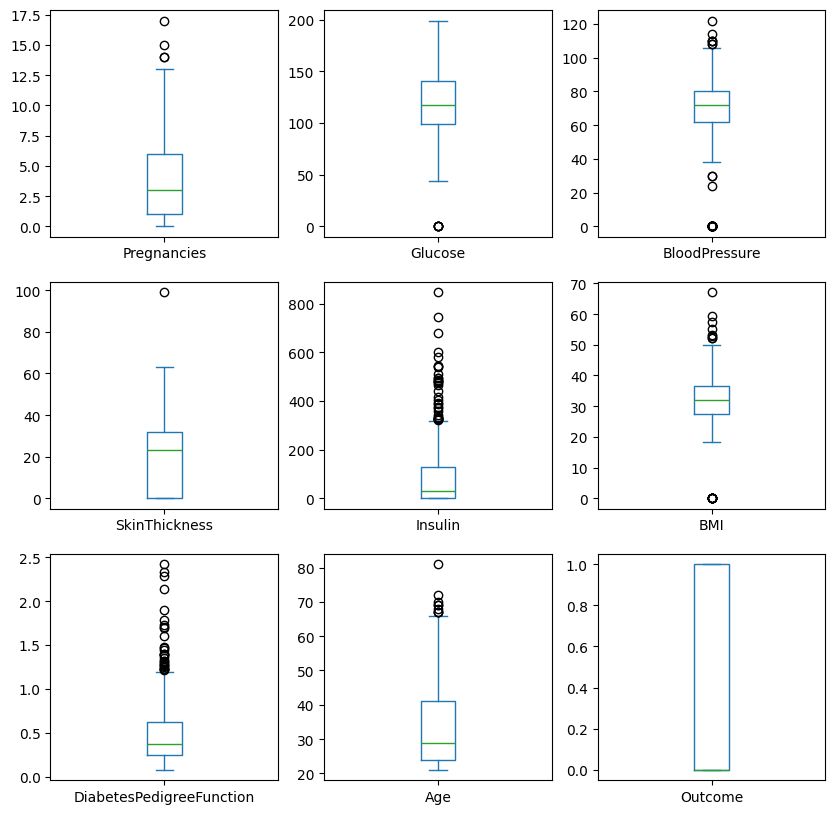

In [60]:
diabetes.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,10))


Handel Outlier using Interquartile Range (IQR)

In [61]:
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(diabetes.drop('Outcome', axis=1))

mask = yhat != -1
data_no_outliers = diabetes[mask]

print("Original Data Summary:")
print(diabetes.describe())

print("\nData without Outliers Summary:")
print(data_no_outliers.describe())


Original Data Summary:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.0

In [62]:
for column in diabetes.columns[:-1]:
    q1 = diabetes[column].quantile(0.25)
    q3 = diabetes[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    diabetes[column] = np.where(diabetes[column] < lower_bound, lower_bound, diabetes[column])
    diabetes[column] = np.where(diabetes[column] > upper_bound, upper_bound, diabetes[column])

print("\nData with Capped Outliers Summary:")
print(diabetes.describe())


Data with Capped Outliers Summary:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.837240  121.136230      70.684896      20.511719   73.652669   
std       3.344157   31.187468      14.197239      15.844744   93.576029   
min       0.000000   37.125000      35.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      13.500000  199.000000     107.000000      80.000000  318.125000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.125065                  0.458914   33.199870    0.348958  
std      7.049584                  0.285596   11.628404    0.476951  

Pregnancies                    Axes(0.125,0.653529;0.227941x0.226471)
Glucose                     Axes(0.398529,0.653529;0.227941x0.226471)
BloodPressure               Axes(0.672059,0.653529;0.227941x0.226471)
SkinThickness                  Axes(0.125,0.381765;0.227941x0.226471)
Insulin                     Axes(0.398529,0.381765;0.227941x0.226471)
BMI                         Axes(0.672059,0.381765;0.227941x0.226471)
DiabetesPedigreeFunction           Axes(0.125,0.11;0.227941x0.226471)
Age                             Axes(0.398529,0.11;0.227941x0.226471)
Outcome                         Axes(0.672059,0.11;0.227941x0.226471)
dtype: object

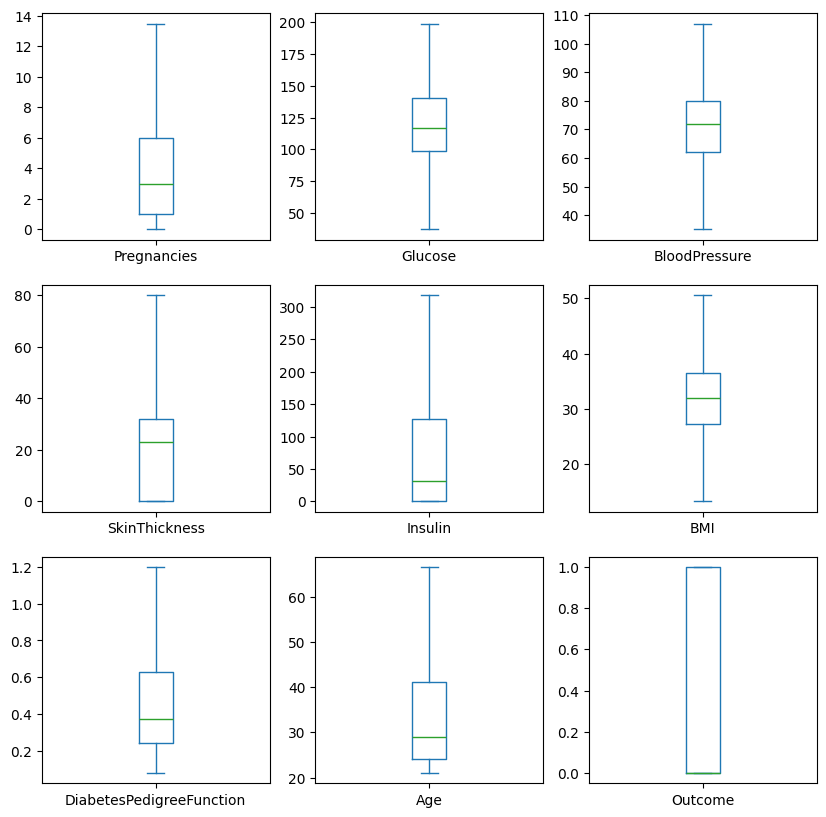

In [63]:
diabetes.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,10))


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

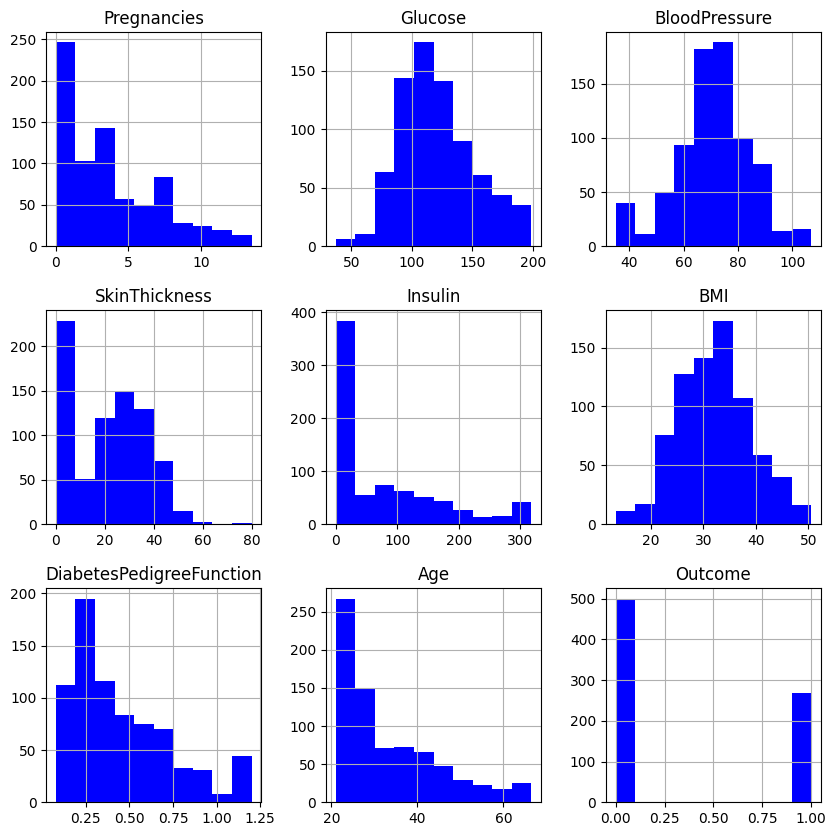

In [64]:
diabetes.hist(figsize=(10,10), color = "blue")

In [65]:
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.6   
1          1.0     85.0           66.0           29.0      0.0  26.6   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0        1  
1                     0.351  31.0        0  
2                     0.672  32.0        1  
3                     0.167  21.0        0  
4                     1.200  33.0        1

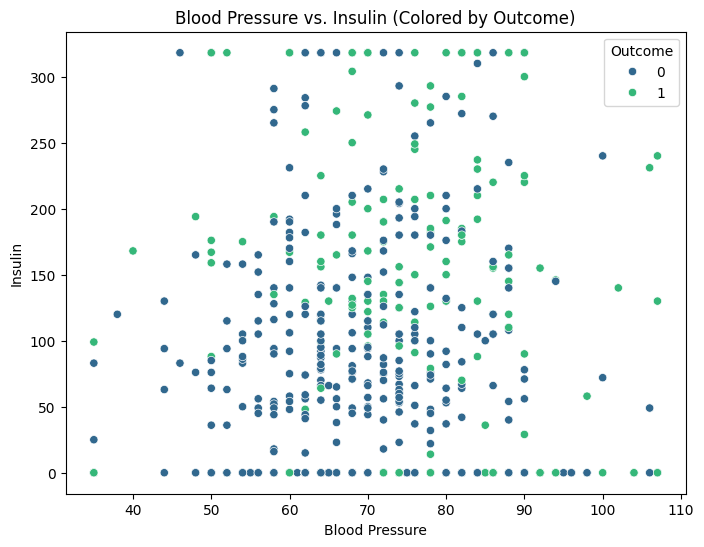

In [66]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BloodPressure', y='Insulin', hue='Outcome', data=diabetes, palette='viridis')
plt.title('Blood Pressure vs. Insulin (Colored by Outcome)')
plt.xlabel('Blood Pressure')
plt.ylabel('Insulin')
plt.show()

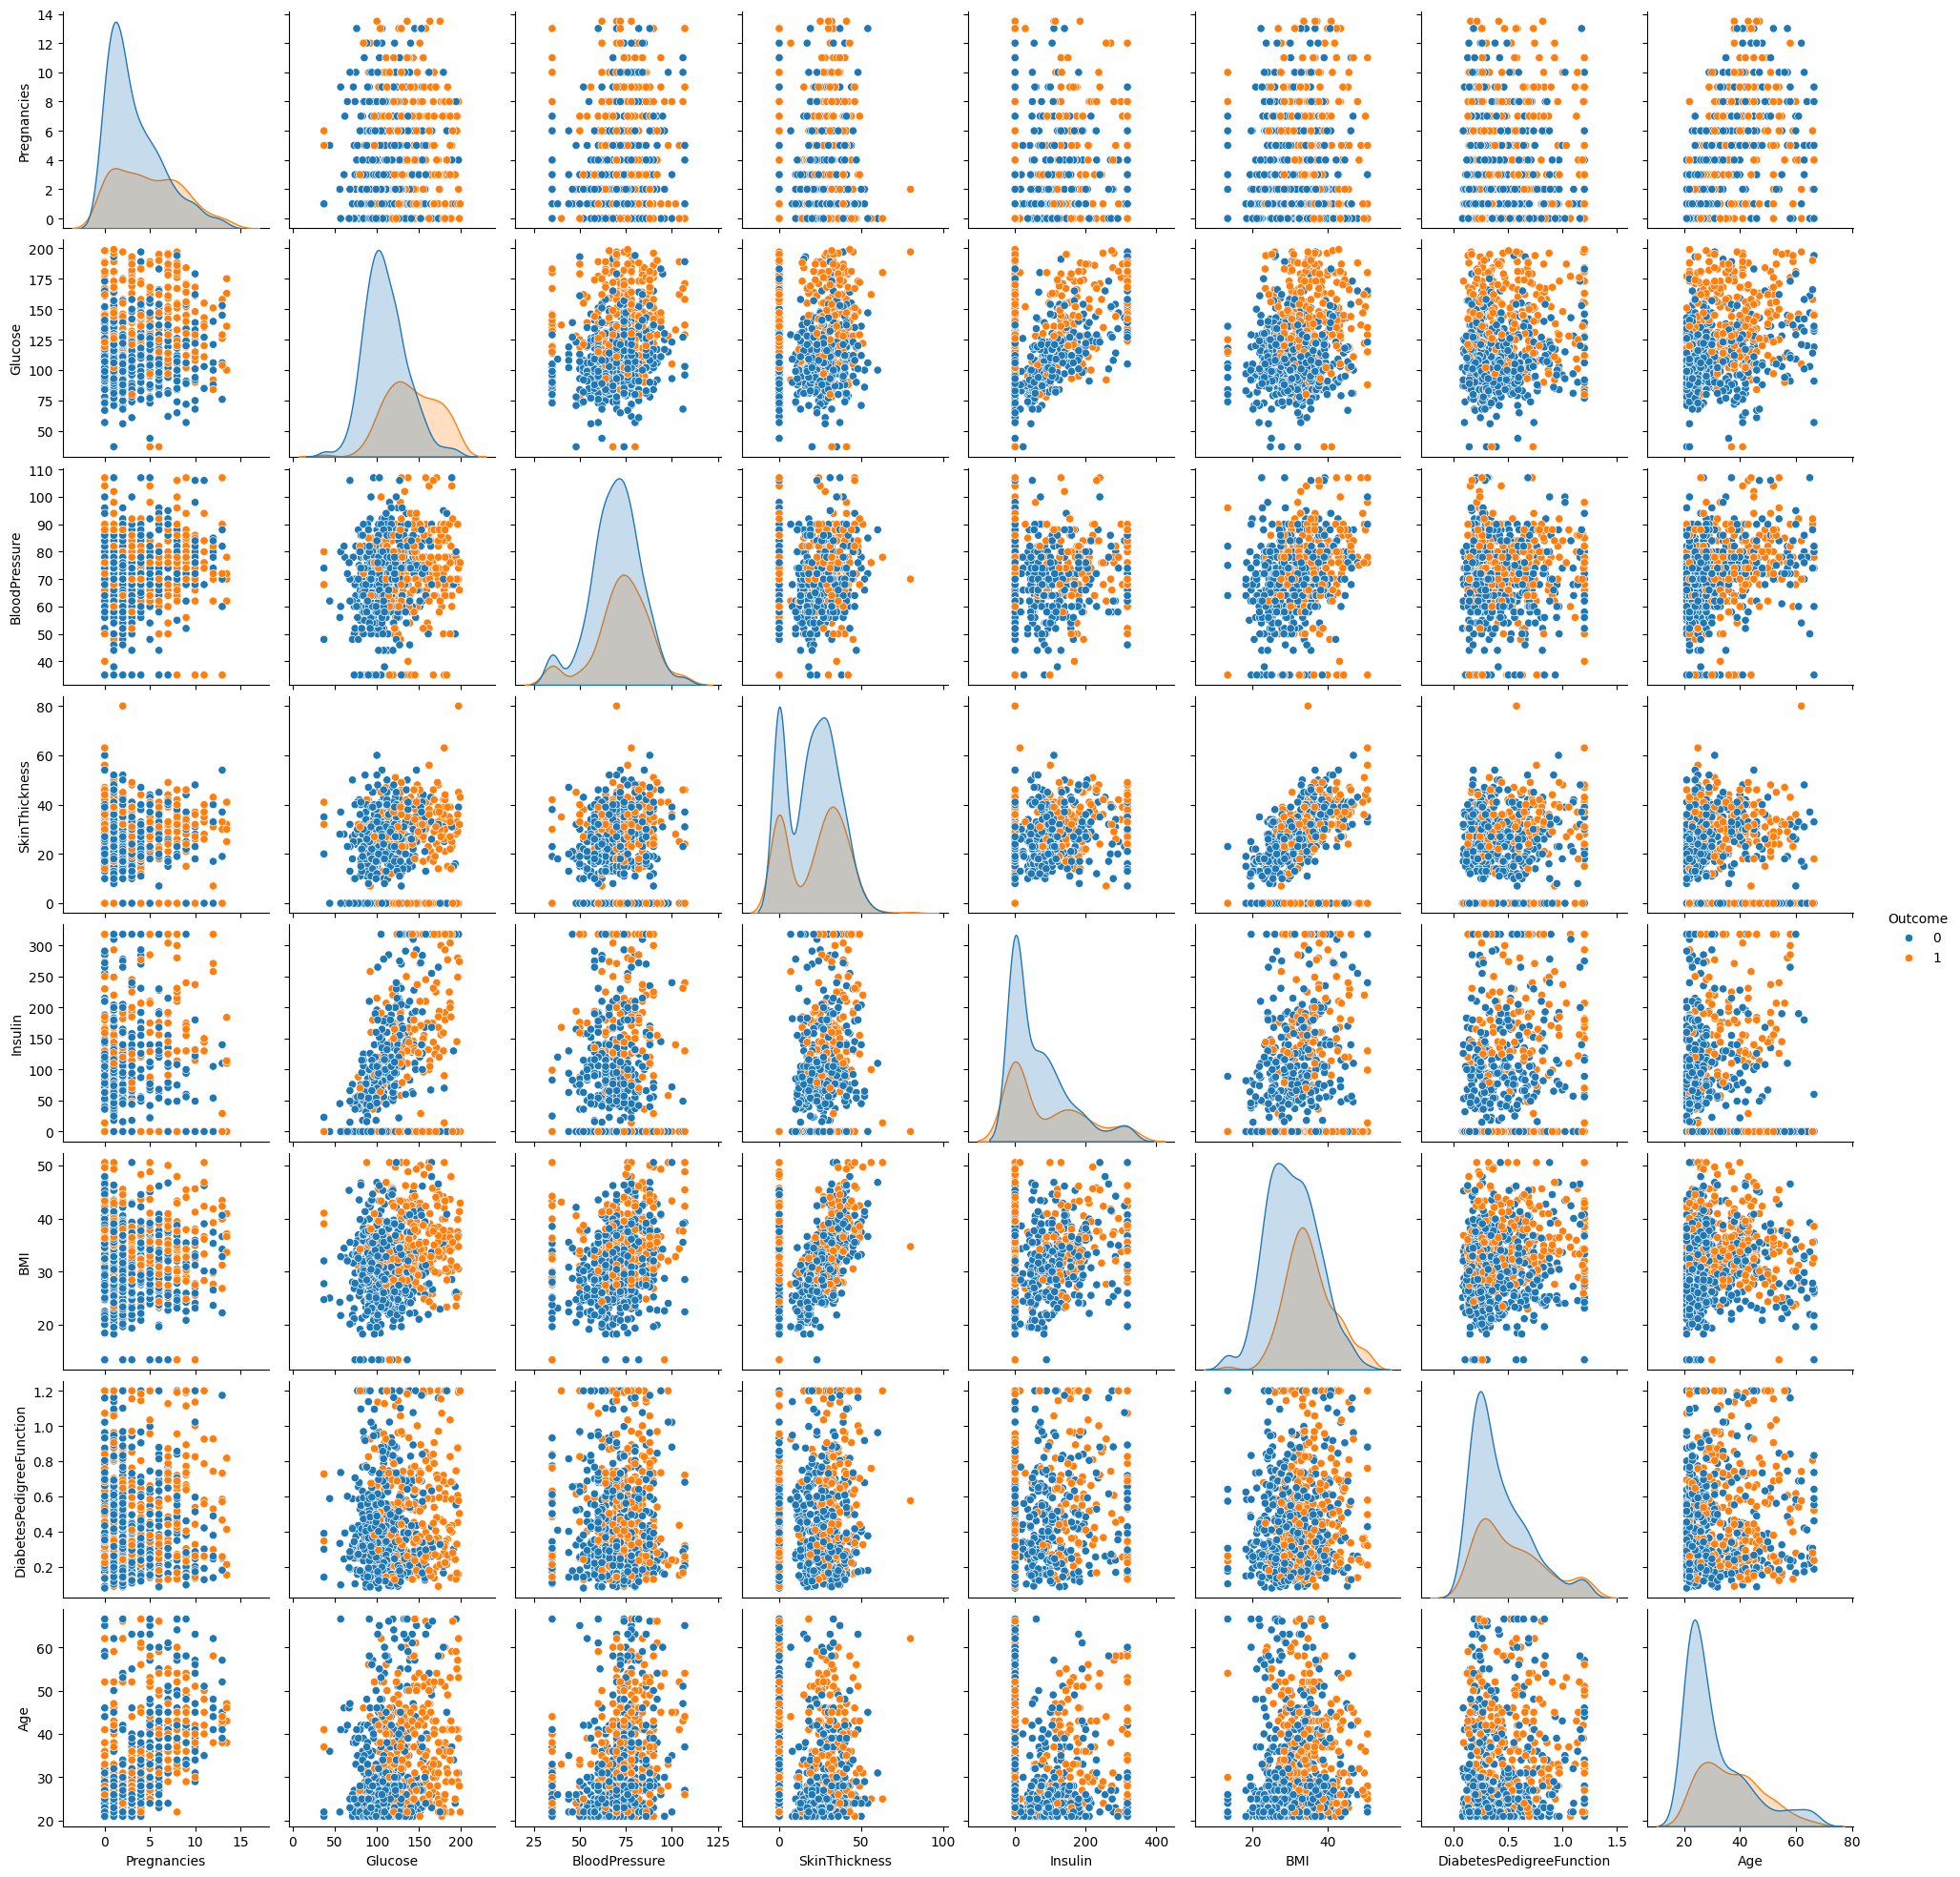

In [67]:
sns.pairplot(diabetes, hue='Outcome')
plt.show()


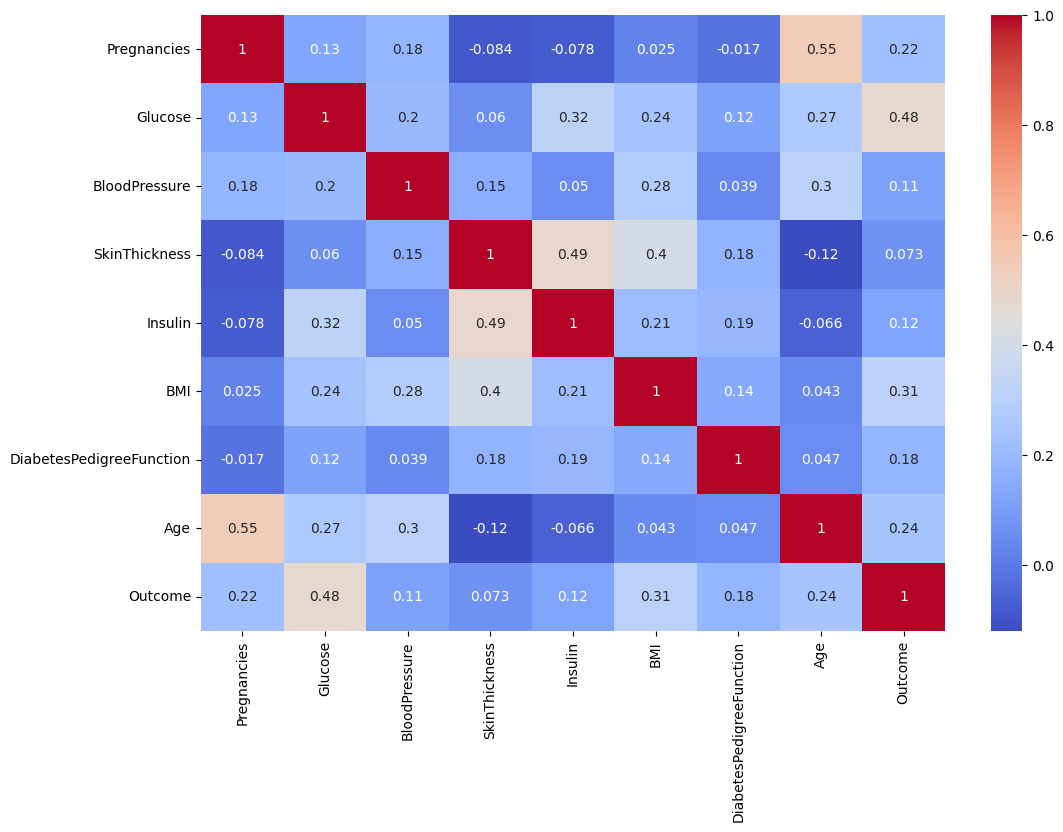

In [68]:
plt.figure(figsize=(12, 8))
sns.heatmap(diabetes.corr(), annot=True, cmap='coolwarm')
plt.show()


Heatmaps display the relationship between different variables in a dataset using various colors. Darker colors indicate a stronger relationship between variables, while lighter colors signify a weak or no correlation.


Pregnancies & Outcome: As the number of pregnancies increases,
the probability of diabetes goes up, indicated by a darker color.

Glucose & Outcome: Higher glucose levels are associated with an increased risk of diabetes.

BloodPressure & Outcome: The relationship here is not very strong, meaning blood pressure isn't a significant indicator of diabetes.

SkinThickness & Outcome: The correlation is weak, so skin thickness isn't a major factor for diabetes.

Insulin & Outcome: Insulin levels have a weaker impact compared to other variables.

BMI & Outcome: Body Mass Index (BMI) shows a strong correlation with diabetes.

DiabetesPedigreeFunction & Outcome: The Diabetes Pedigree Function indicates the likelihood of diabetes based on family history.

Age & Outcome: Older individuals are more likely to be at risk of diabetes.




# Preper Data

In [69]:
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Models

# Logistic Regression & Gradient Boosting & Support Vector Machine (SVM) & K-Nearest Neighbors (KNN) & Random Forest Classifier

In [70]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100)
}

Train and Evaluate Logistic Regression

In [71]:
model_name = 'Logistic Regression'
model = models[model_name]

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print(f"{model_name} Accuracy: {accuracy:.2f}")

print(f"Classification Report for {model_name}:")
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.75
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



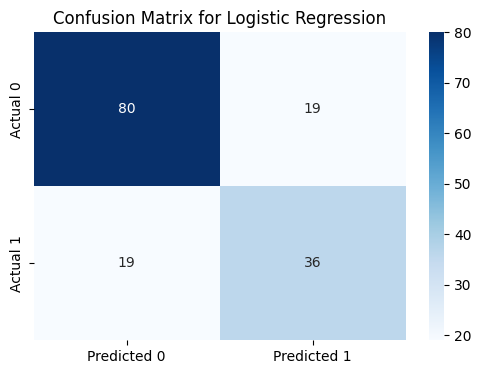

In [72]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Confusion Matrix for {model_name}')
plt.show()

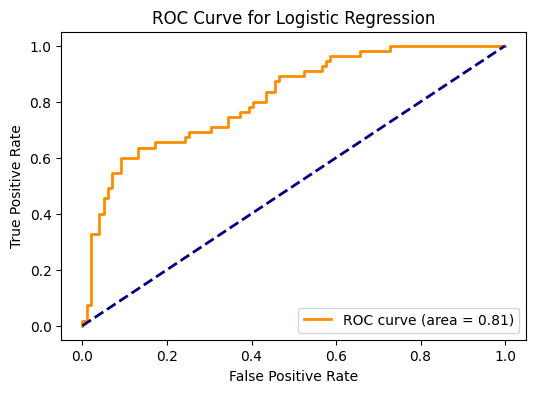

In [73]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {model_name}')
plt.legend(loc="lower right")
plt.show()

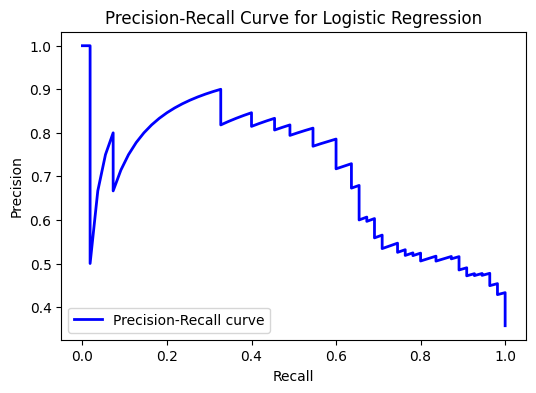

In [74]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve for {model_name}')
plt.legend(loc="lower left")
plt.show()

Train and Evaluate Decision Tree

In [75]:
model_name = 'Decision Tree'
model = models[model_name]

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print(f"{model_name} Accuracy: {accuracy:.2f}")

print(f"Classification Report for {model_name}:")
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.74
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        99
           1       0.62      0.69      0.66        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



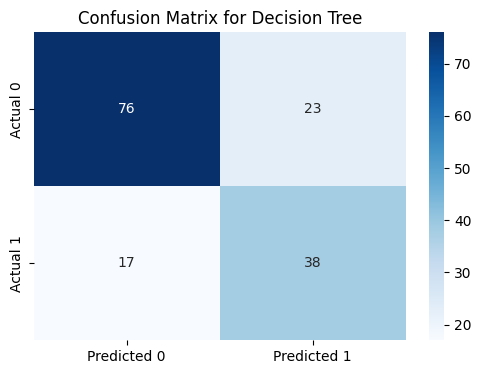

In [76]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Confusion Matrix for {model_name}')
plt.show()

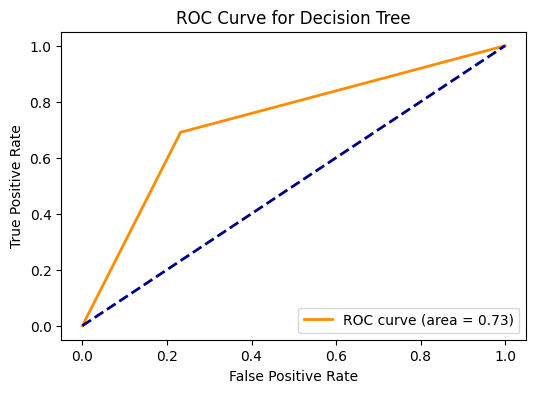

In [77]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {model_name}')
plt.legend(loc="lower right")
plt.show()

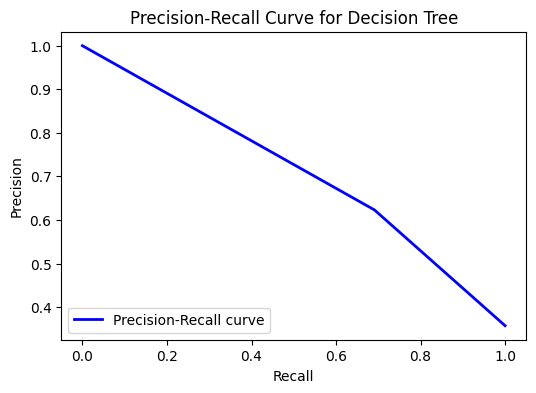

In [78]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve for {model_name}')
plt.legend(loc="lower left")
plt.show()

Train Random forest

In [79]:
model_name = 'Random Forest'
model = models[model_name]

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print(f"{model_name} Accuracy: {accuracy:.2f}")

print(f"Classification Report for {model_name}:")
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.75
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80        99
           1       0.64      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



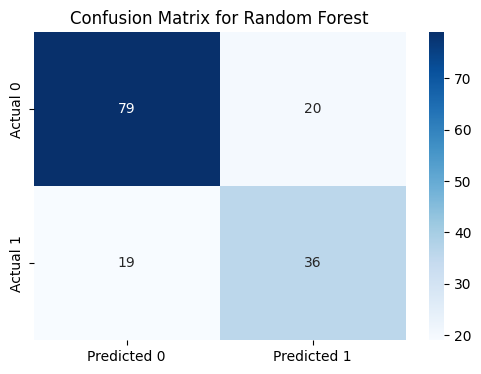

In [80]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Confusion Matrix for {model_name}')
plt.show()

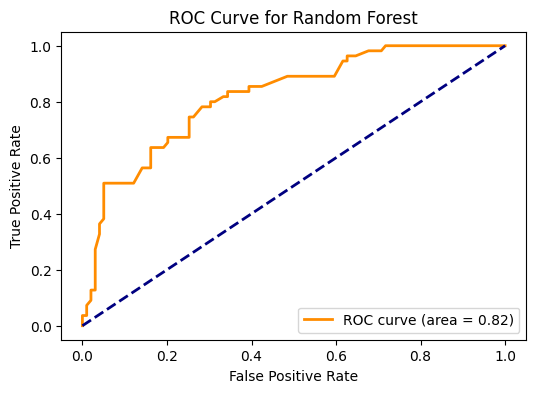

In [81]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {model_name}')
plt.legend(loc="lower right")
plt.show()

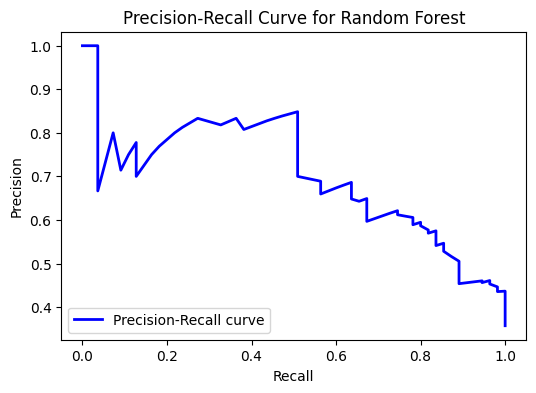

In [82]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve for {model_name}')
plt.legend(loc="lower left")
plt.show()

Train and Evaluate SVM

In [83]:
model_name = 'SVM'
model = models[model_name]

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print(f"{model_name} Accuracy: {accuracy:.2f}")

print(f"Classification Report for {model_name}:")
print(classification_report(y_test, y_pred))

SVM Accuracy: 0.72
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.77      0.80      0.79        99
           1       0.62      0.58      0.60        55

    accuracy                           0.72       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154



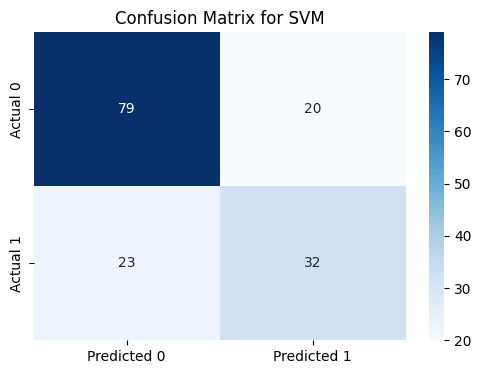

In [84]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Confusion Matrix for {model_name}')
plt.show()

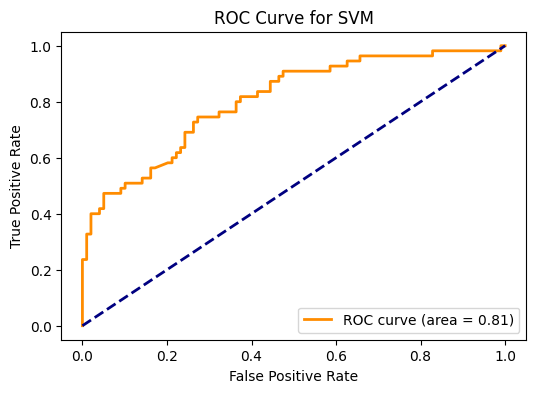

In [85]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {model_name}')
plt.legend(loc="lower right")
plt.show()

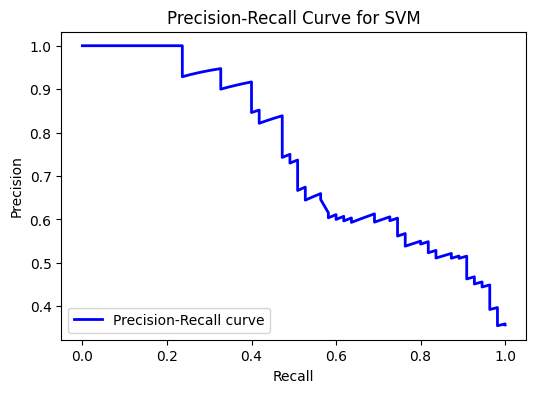

In [86]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve for {model_name}')
plt.legend(loc="lower left")
plt.show()

Train and Evaluate KNN

In [87]:
model_name = 'KNN'
model = models[model_name]

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print(f"{model_name} Accuracy: {accuracy:.2f}")

print(f"Classification Report for {model_name}:")
print(classification_report(y_test, y_pred))

KNN Accuracy: 0.73
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.64      0.55      0.59        55

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.72      0.73      0.72       154



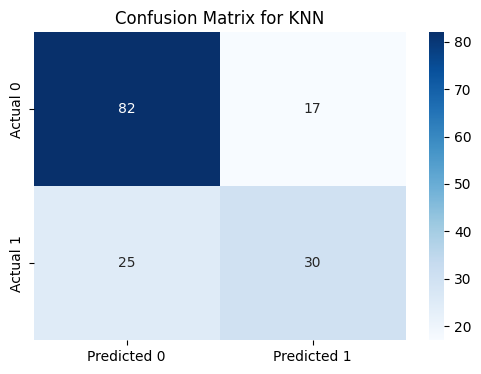

In [88]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Confusion Matrix for {model_name}')
plt.show()

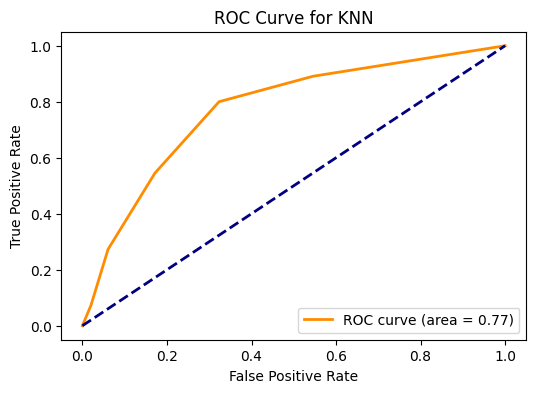

In [89]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {model_name}')
plt.legend(loc="lower right")
plt.show()

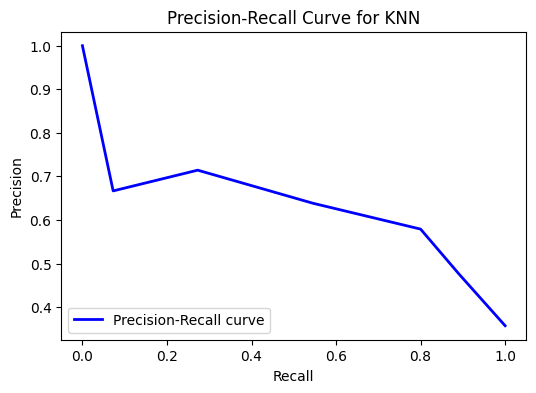

In [90]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve for {model_name}')
plt.legend(loc="lower left")
plt.show()

Train and Evaluate Gradient Boosting

In [91]:
model_name = 'Gradient Boosting'
model = models[model_name]

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print(f"{model_name} Accuracy: {accuracy:.2f}")

print(f"Classification Report for {model_name}:")
print(classification_report(y_test, y_pred))

Gradient Boosting Accuracy: 0.75
Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



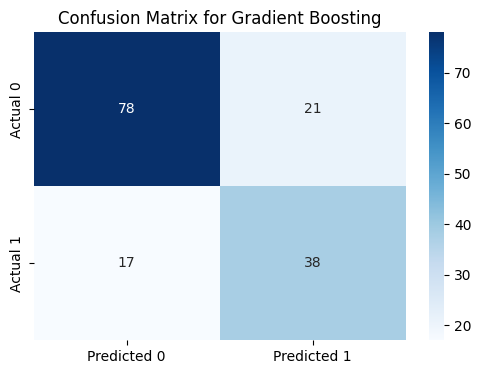

In [92]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Confusion Matrix for {model_name}')
plt.show()

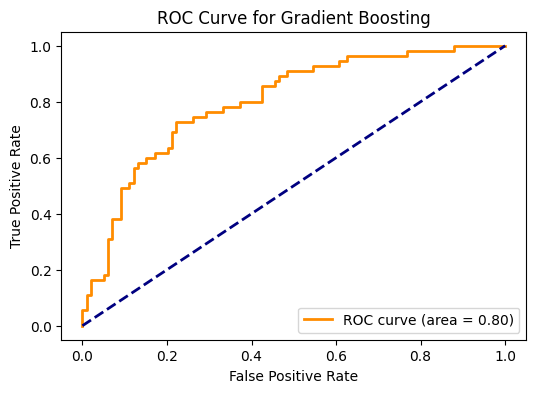

In [93]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {model_name}')
plt.legend(loc="lower right")
plt.show()

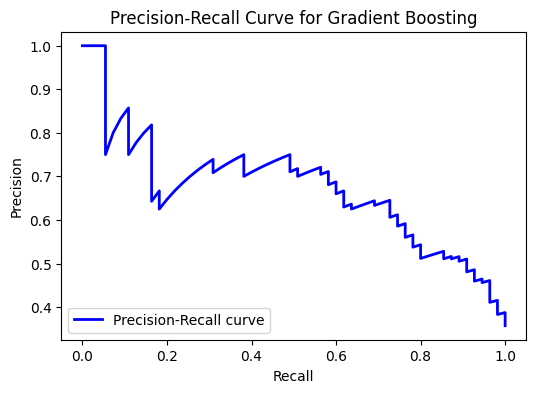

In [94]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve for {model_name}')
plt.legend(loc="lower left")
plt.show()

# Compare Models

In [95]:
model_comparison = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'AUC-ROC': []
}

for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else [0] * len(y_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)

    model_comparison['Model'].append(model_name)
    model_comparison['Accuracy'].append(accuracy)
    model_comparison['Precision'].append(precision)
    model_comparison['Recall'].append(recall)
    model_comparison['F1-Score'].append(f1)
    model_comparison['AUC-ROC'].append(auc_roc)

comparison_df = pd.DataFrame(model_comparison)

Training and evaluating Logistic Regression...
Training and evaluating Decision Tree...
Training and evaluating Random Forest...
Training and evaluating SVM...
Training and evaluating KNN...
Training and evaluating Gradient Boosting...


In [96]:
print("Model Comparison Table:")
print(comparison_df)



Model Comparison Table:
                 Model  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0  Logistic Regression  0.753247   0.654545  0.654545  0.654545  0.814509
1        Decision Tree  0.746753   0.629032  0.709091  0.666667  0.738384
2        Random Forest  0.753247   0.649123  0.672727  0.660714  0.813039
3                  SVM  0.720779   0.615385  0.581818  0.598131  0.805510
4                  KNN  0.727273   0.638298  0.545455  0.588235  0.772727
5    Gradient Boosting  0.759740   0.650000  0.709091  0.678261  0.800184


<ipython-input-97-6aa0b47cc4ec>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=comparison_df, palette='viridis')
<ipython-input-97-6aa0b47cc4ec>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Precision', data=comparison_df, palette='viridis')


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Decision Tree'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'SVM'),
  Text(4, 0, 'KNN'),
  Text(5, 0, 'Gradient Boosting')])

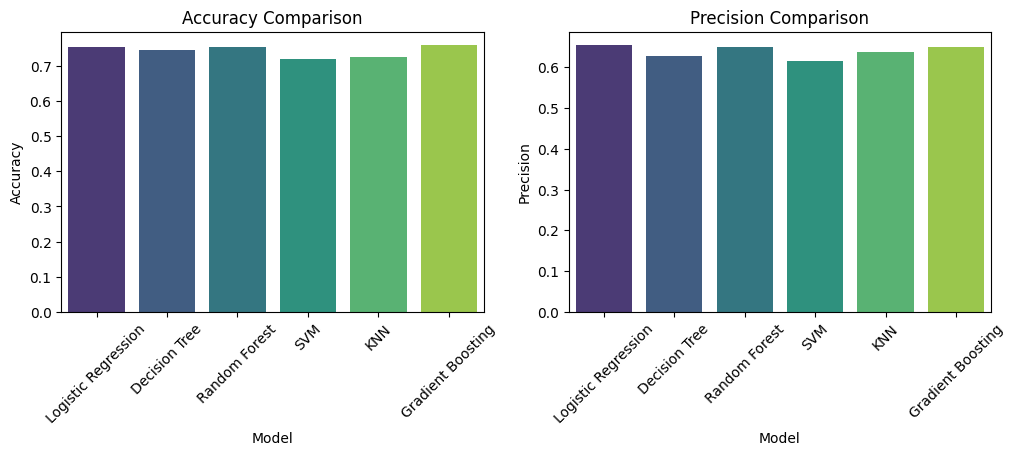

In [97]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=comparison_df, palette='viridis')
plt.title('Accuracy Comparison')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Precision', data=comparison_df, palette='viridis')
plt.title('Precision Comparison')
plt.xticks(rotation=45)

<ipython-input-98-386b48f9b818>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Recall', data=comparison_df, palette='viridis')


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Decision Tree'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'SVM'),
  Text(4, 0, 'KNN'),
  Text(5, 0, 'Gradient Boosting')])

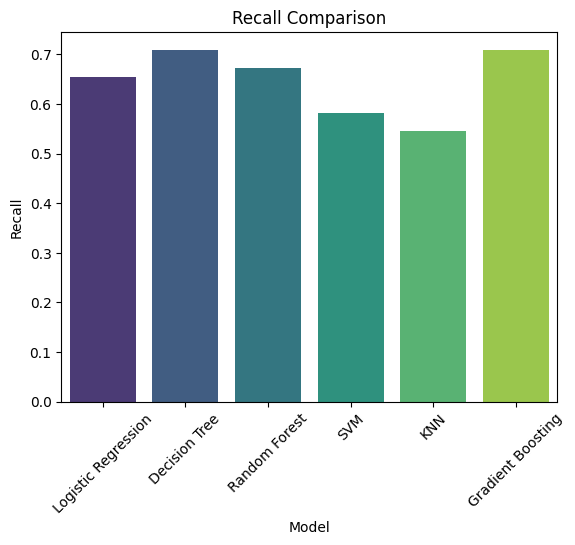

In [98]:
sns.barplot(x='Model', y='Recall', data=comparison_df, palette='viridis')
plt.title('Recall Comparison')
plt.xticks(rotation=45)

<ipython-input-99-97625a36e40b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1-Score', data=comparison_df, palette='viridis')


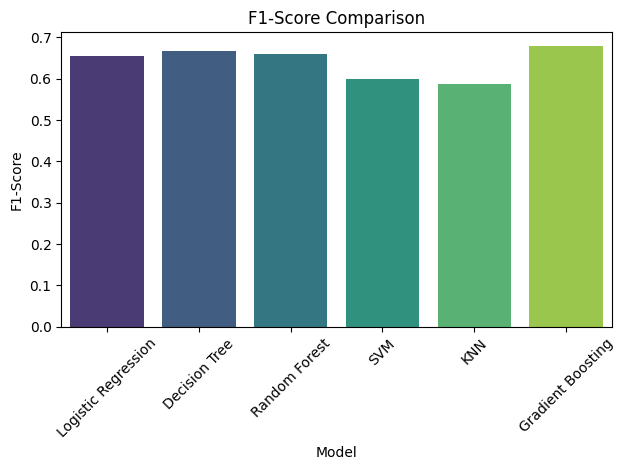

In [99]:
sns.barplot(x='Model', y='F1-Score', data=comparison_df, palette='viridis')
plt.title('F1-Score Comparison')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<ipython-input-100-c7508983b6d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='AUC-ROC', data=comparison_df, palette='viridis')


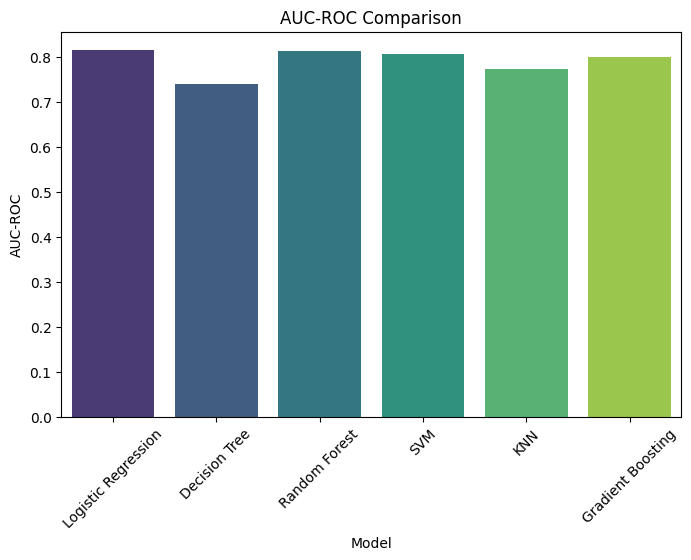

In [100]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='AUC-ROC', data=comparison_df, palette='viridis')
plt.title('AUC-ROC Comparison')
plt.xticks(rotation=45)
plt.show()